# Demo: Extracting curve data from PDFs

The notebook demonstrates how to extract `curve` objects from PDFs using `pdfplumber`.

In [1]:
import pdfplumber
print(pdfplumber.__version__)

0.7.1


## Load the PDF

Here, we're using the USDA's "[National Weekly Ag Energy Round-Up](https://www.ams.usda.gov/mnreports/lswagenergy.pdf)", a weekly one-page report.

In [2]:
report = pdfplumber.open("../pdfs/ag-energy-round-up-2017-02-24.pdf").pages[0]

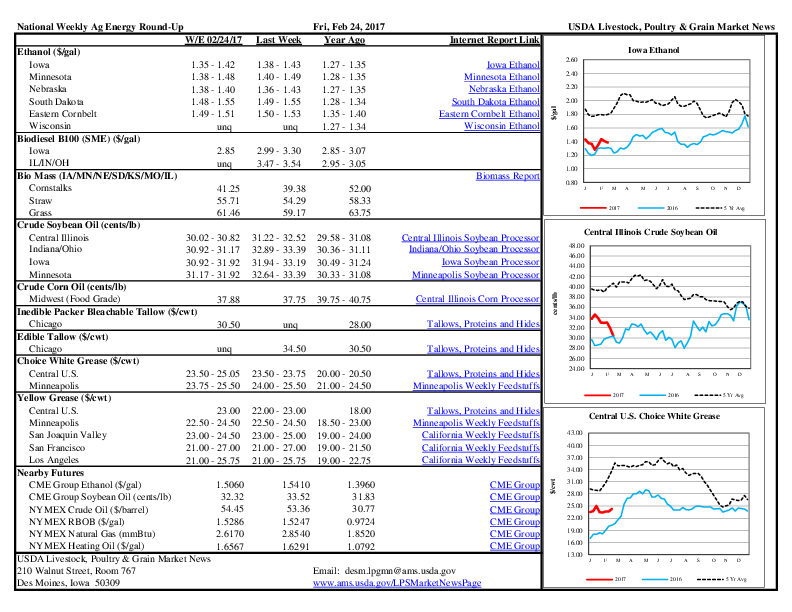

In [3]:
im = report.to_image()
im

## Examine the `curve` objects

`Page` objects have a `.curves` property, which contains a list of `curve` objects found on the page. This report contains 9 curves, three per chart:

In [4]:
len(report.curves)

9

Here's what the first `curve` object looks like:

In [5]:
report.curves[0]

{'x0': 585.31,
 'y0': 462.31,
 'x1': 607.67,
 'y1': 472.87,
 'width': 22.360000000000014,
 'height': 10.560000000000002,
 'pts': [(585.31, 472.56),
  (588.48, 468.84),
  (591.72, 468.12),
  (594.84, 462.31),
  (598.08, 466.8),
  (601.32, 472.87),
  (604.44, 470.88),
  (607.67, 469.44)],
 'linewidth': 2.25,
 'stroke': True,
 'fill': False,
 'evenodd': False,
 'stroking_color': (1, 0, 0),
 'non_stroking_color': 1,
 'object_type': 'curve',
 'page_number': 1,
 'points': [(585.31, 139.44),
  (588.48, 143.16000000000003),
  (591.72, 143.88),
  (594.84, 149.69),
  (598.08, 145.2),
  (601.32, 139.13),
  (604.44, 141.12),
  (607.67, 142.56)],
 'top': 139.13,
 'bottom': 149.69,
 'doctop': 139.13}

## Display the curves

We can get a quick sense of where the curves are by passing them to `PageImage.draw_lines`:

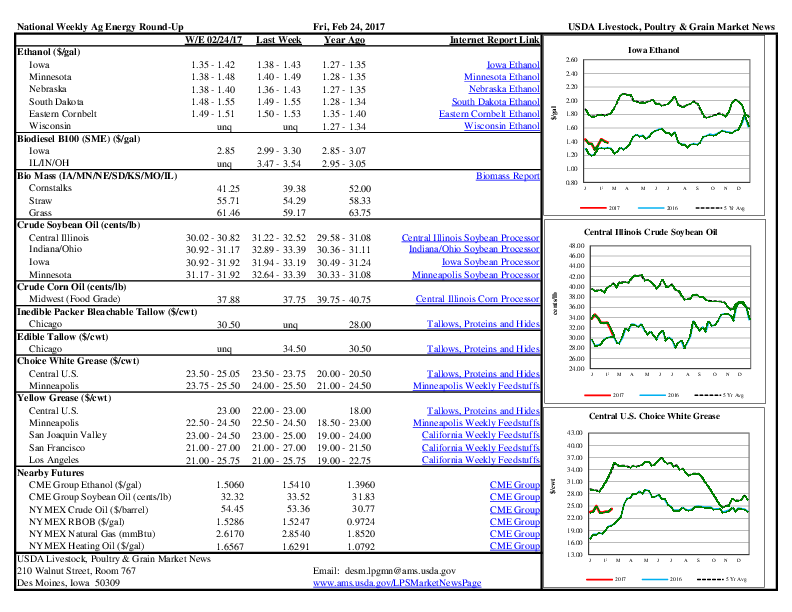

In [6]:
im.draw_lines(report.curves, stroke="green", stroke_width=2)

We can get a more better sense of the curves by cycling through a three-color palette:

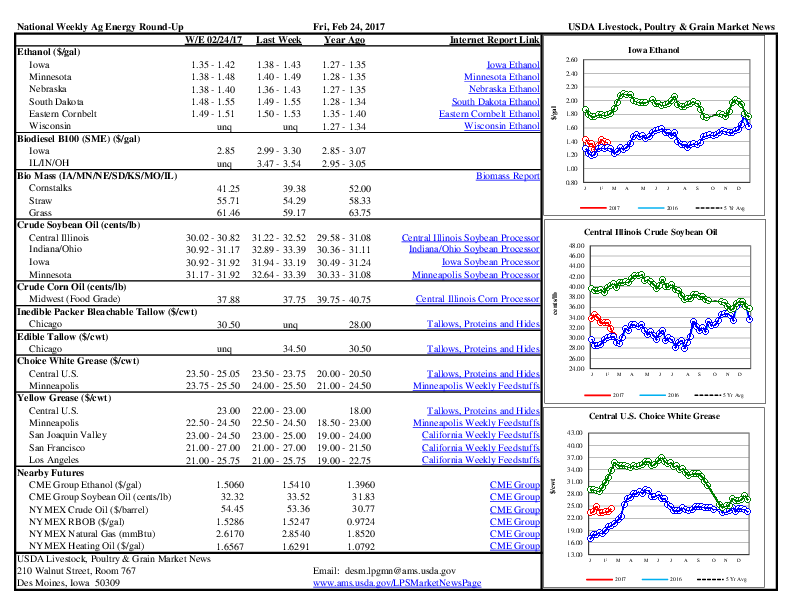

In [7]:
im.reset()
colors = [ "red", "blue", "green" ]
for i, curve in enumerate(report.curves):
    stroke = colors[i%len(colors)]
    im.draw_circles(curve["points"], radius=3, stroke=stroke, fill="white")
    im.draw_line(curve["points"], stroke=stroke, stroke_width=2)
im

We can also use `pdfplumber` to identify the horizontal gridlines:

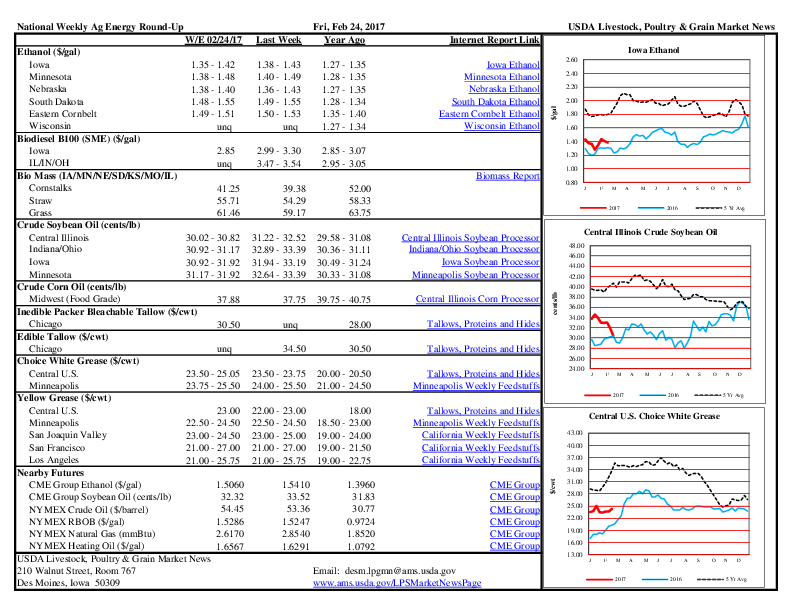

In [8]:
gridlines =  [ x for x in report.lines
    if x["width"] > 10 and x["x0"] > report.width / 2 ]

im.reset().draw_lines(gridlines)

---

---

---